UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
plt.style.use('ggplot')


In [193]:
# %%bash
# ls ../input/utkface_aligned_cropped
# # it seems crop_part1 conists of subset of data contained in UTKFace so we won't be using it.

In [194]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Constants**

In [195]:
DATA_DIR = "./UTKFace"
TEST_DIR = "./TEST"
TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 200
ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'hispanic'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())
ID_AGE_MAP ={0: '-18', 1:'18-24', 2:'25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65-75',7:'75+'}
AGE_ID_MAP = dict((a, i) for i, a in ID_AGE_MAP.items())

print('ID_GENDER_MAP: ',ID_GENDER_MAP)
print('GENDER_ID_MAP: ', GENDER_ID_MAP)
print('ID_RACE_MAP: ', ID_RACE_MAP)
print('RACE_ID_MAP: ', RACE_ID_MAP)
print('ID_AGE_MAP: ', ID_AGE_MAP)
print('AGE_ID_MAP: ', AGE_ID_MAP)

ID_GENDER_MAP:  {0: 'male', 1: 'female'}
GENDER_ID_MAP:  {'male': 0, 'female': 1}
ID_RACE_MAP:  {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'hispanic'}
RACE_ID_MAP:  {'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'hispanic': 4}
ID_AGE_MAP:  {0: '-18', 1: '18-24', 2: '25-34', 3: '35-44', 4: '45-54', 5: '55-64', 6: '65-75', 7: '75+'}
AGE_ID_MAP:  {'-18': 0, '18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-75': 6, '75+': 7}


In [196]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_GENDER_MAP[int(gender)], ID_RACE_MAP[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [197]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))

# Total of 64 pictures
test_files = glob.glob(os.path.join(TEST_DIR,"*.jpg"))

In [198]:
attributes = list(map(parse_filepath, files))
test_attributes = list(map(parse_filepath, test_files))

In [199]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.sample(10)

age  gender      race                                             file
343     12  female     white  ./UTKFace\12_1_0_20170109214435512.jpg.chip.jpg
17966   50    male     white  ./UTKFace\50_0_0_20170120222416184.jpg.chip.jpg
17838    4  female  hispanic   ./UTKFace\4_1_4_20170109191223274.jpg.chip.jpg
17872   50    male     white  ./UTKFace\50_0_0_20170111171747313.jpg.chip.jpg
13736   36    male     white  ./UTKFace\36_0_0_20170117163541966.jpg.chip.jpg
11834   32    male    indian  ./UTKFace\32_0_3_20170104214518494.jpg.chip.jpg
6177    26    male     black  ./UTKFace\26_0_1_20170116204838256.jpg.chip.jpg
3415    22    male    indian  ./UTKFace\22_0_3_20170117143056386.jpg.chip.jpg
6194    26    male     black  ./UTKFace\26_0_1_20170116210257827.jpg.chip.jpg
19764   57  female     white  ./UTKFace\57_1_0_20170117160411871.jpg.chip.jpg

In [200]:
df_test = pd.DataFrame(test_attributes)
df_test['file'] = test_files
df_test.columns = ['age', 'gender', 'race', 'file']
df_test.sample(4)

age  gender    race                                          file
47   40    male  indian                         ./TEST\40_0_3_001.jpg
41   35    male   white                         ./TEST\35_0_0_003.jpg
13   25  female   white                         ./TEST\25_1_0_002.jpg
61   59    male   asian  ./TEST\59_0_2_20170104022521749.jpg.chip.jpg

In [201]:
print(df.shape)
print(df_test.shape)

(23679, 4)
(64, 4)


# Exploratory analysis

In [202]:
df.describe()

age
count  23679.000000
mean      33.297605
std       19.887057
min        1.000000
25%       23.000000
50%       29.000000
75%       45.000000
max      116.000000

Saving figure Gender_&_Race_Boxplot


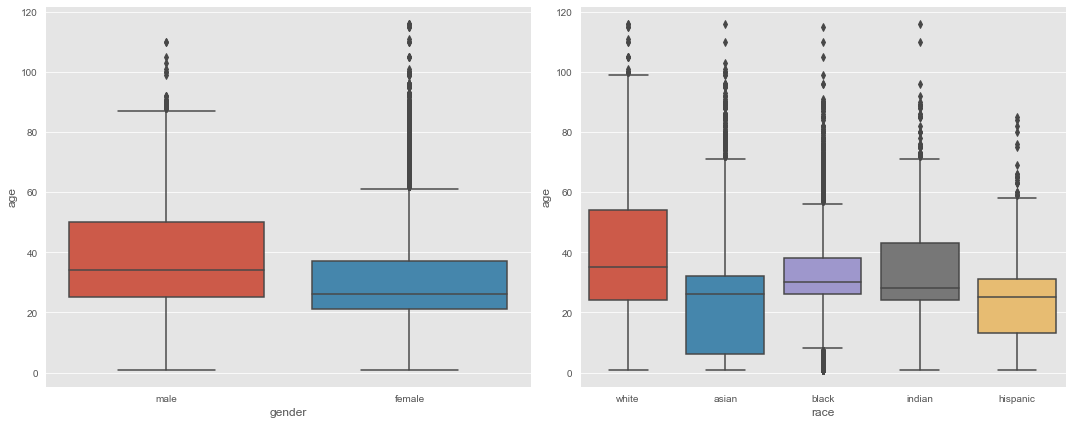

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
a = sns.boxplot(data=df, x='gender', y='age', ax=ax1)
a = sns.boxplot(data=df, x='race', y='age', ax=ax2)
save_fig('Gender_&_Race_Boxplot')

From the plot we can see that most of people are within 10 and 55 years of age. Most probably, we'll discard the dataset for rest of the ages.

Saving figure Gender_w_Age_Boxplot


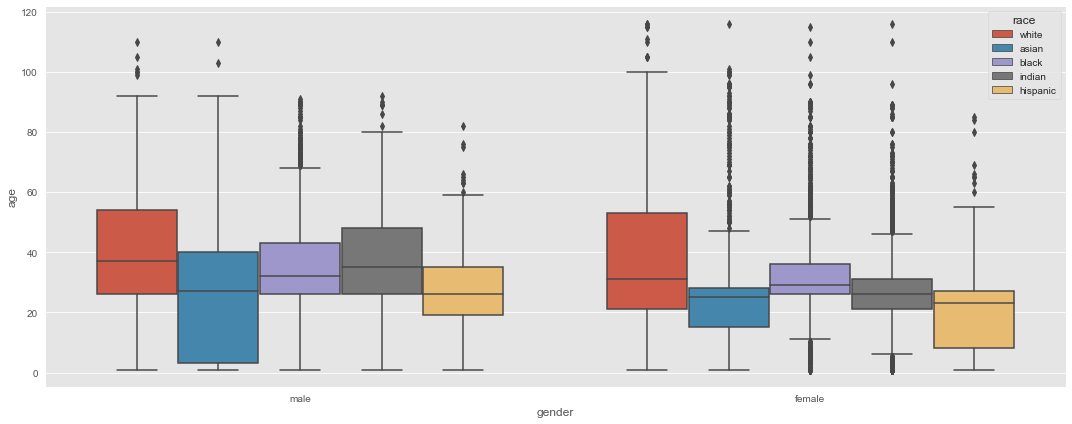

In [204]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='gender', y='age', hue='race')
save_fig('Gender_w_Age_Boxplot')

Saving figure Race_w_Gender_Bargraph


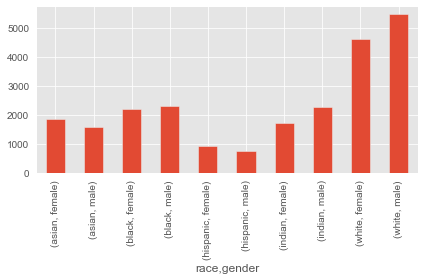

In [205]:
df.groupby(by=['race', 'gender'])['age'].count().plot(kind='bar')
save_fig('Race_w_Gender_Bargraph')

It turns out that there are many images of *white male* and *while female*. images from *others* category are very less in number compared to rest of the categories especially *white* category.
Let's analyze our data from *age* perspective.

Saving figure Age_histogram


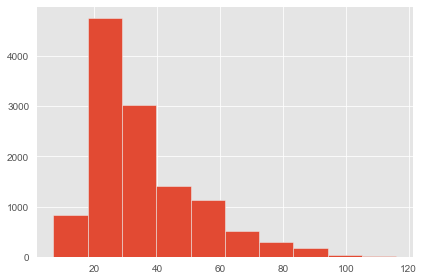

In [214]:
df['age'].hist()
save_fig('Age_histogram')

In [207]:
#Getting rid of under 7 years old. 
df = df[df['age'] > 6]  

#Keeping a random sampling of 50% of the white images. 
white_keep = df.loc[df['race']=='white'].sample(frac=0.5, replace=False, random_state=1)
df = pd.concat([df.loc[df['race']!='white'], white_keep], axis = 0)

Saving figure Race_w_Gender_Bargraph_reduced_caucasian


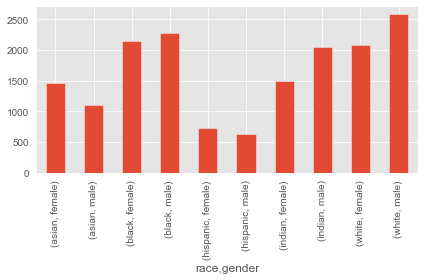

In [208]:
df.groupby(by=['race', 'gender'])['age'].count().plot(kind='bar')
save_fig('Race_w_Gender_Bargraph_reduced_caucasian')

In [210]:
#Keeping a random sampling of 60% of the white images. 
white_keep = df.loc[df['race']=='white'].sample(frac=0.6, replace=False, random_state=1)
df = pd.concat([df.loc[df['race']!='white'], white_keep], axis = 0)

In [211]:
#Keeping a random sampling of 62.5% of the black images. 
black_keep = df.loc[df['race']=='black'].sample(frac=0.625, replace=False, random_state=1)
df = pd.concat([df.loc[df['race']!='black'], black_keep], axis = 0)

In [212]:
#Keeping a random sampling of 75% of the indian images. 
indian_keep = df.loc[df['race']=='indian'].sample(frac=0.75, replace=False, random_state=1)
df = pd.concat([df.loc[df['race']!='indian'], indian_keep], axis = 0)

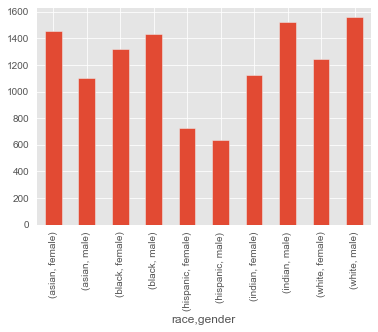

In [213]:
df.groupby(by=['race', 'gender'])['age'].count().plot(kind='bar')

In [215]:
def make_age_class(dataFrame):
    age_class = []
    for i in dataFrame['age']:
        i = int(i)
        if i < 18:
            age_class.append('-18')
        elif (18<=i<=24):
            age_class.append('18-24')
        elif (25<=i<=34):
            age_class.append('25-34')
        elif (35<=i<=44):
            age_class.append('35-44')
        elif (45<=i<=54):
            age_class.append('45-54')
        elif (55<=i<=64):
            age_class.append('55-64')
        elif (65<=i<=75):
            age_class.append('65-75')
        else:
            age_class.append('75+')
    return(age_class)

In [217]:
     
# creating age class
# Age groups = [‘-17',’18-24', '25-34', '35-44','45-54', '55-64', '65-75', '75+’]
df['age_class'] = make_age_class(df)
# changing column orders
df = df[['age_class','gender', 'race', 'file', 'age']]

df.sample(10)

age_class  gender      race  \
18218     45-54  female  hispanic   
3564      18-24  female     asian   
18515     45-54    male    indian   
11696     25-34    male     black   
22298       75+    male     white   
3333      18-24    male     white   
22080     65-75    male    indian   
6323      25-34    male     asian   
12751     25-34  female     asian   
11859     25-34    male    indian   

                                                  file  age  
18218  ./UTKFace\50_1_4_20170105173053477.jpg.chip.jpg   50  
3564   ./UTKFace\22_1_2_20170116161424702.jpg.chip.jpg   22  
18515  ./UTKFace\52_0_3_20170120140320609.jpg.chip.jpg   52  
11696  ./UTKFace\32_0_1_20170113134708200.jpg.chip.jpg   32  
22298  ./UTKFace\76_0_0_20170111210806003.jpg.chip.jpg   76  
3333   ./UTKFace\22_0_0_20170116201355808.jpg.chip.jpg   22  
22080  ./UTKFace\73_0_3_20170119212042841.jpg.chip.jpg   73  
6323   ./UTKFace\26_0_2_20170116181222639.jpg.chip.jpg   26  
12751  ./UTKFace\34_1_2_20170104201443273.jpg.chip.jpg   34  
11859  ./UTKFace\32_0_3_20170119192340778.jpg.chip.jpg   32

In [218]:
# creating age class
# Age groups = [‘-17',’18-24', '25-34', '35-44','45-54', '55-64', '65-75', '75+’]
df_test['age_class'] = make_age_class(df_test)
# changing column orders
df_test = df_test[['age_class','gender', 'race', 'file', 'age']]

df_test.sample(10)

age_class  gender   race                                          file  age
44     35-44    male  asian                         ./TEST\36_0_2_000.jpg   36
28     25-34    male  white                         ./TEST\29_0_0_003.jpg   29
25     25-34    male  black  ./TEST\28_0_1_20170116194234082.jpg.chip.jpg   28
12     25-34  female  white                         ./TEST\25_1_0_000.jpg   25
48     35-44  female  asian                         ./TEST\40_1_2_000.jpg   40
26     25-34  female  white                         ./TEST\28_1_0_000.jpg   28
53     45-54    male  white  ./TEST\52_0_0_20170111181750506.jpg.chip.jpg   52
0      18-24    male  white                         ./TEST\23_0_0_001.jpg   23
15     25-34  female  asian                         ./TEST\25_1_2_001.jpg   25
3      18-24    male  asian                         ./TEST\23_0_2_002.jpg   23

In [ ]:
df.groupby(by=['age_class'])['gender'].count().plot(kind='bar')

In [223]:
#Keeping a random sampling of 75% of the indian images. 
age_keep = df.loc[df['age_class']=='25-34'].sample(frac=0.5, replace=False, random_state=1)
df = pd.concat([df.loc[df['age_class']!='25-34'], age_keep], axis = 0)

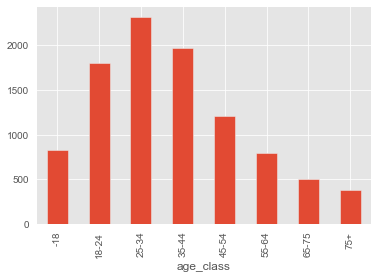

In [224]:
df.groupby(by=['age_class'])['gender'].count().plot(kind='bar')

In [20]:
df['age'].describe()

count    16523.000000
mean        35.906312
std         16.830307
min          7.000000
25%         26.000000
50%         30.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [21]:
# df = df[(df['age'] > 10) & (df['age'] < 65)]

# Data prep

80% Train 20% Valid 64 pictures for our test

In [225]:
# stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, valid_index in split.split(df, df['gender']):
    print("TRAIN:", train_index, "TEST:", valid_index)
    train_idx = train_index
    valid_idx = valid_index

TRAIN: [7713 8298 2920 ... 6922 4943 8460] TEST: [5797 6784 6664 ... 2006 2976 9578]


In [226]:
# Concatenate df and test df for getting test index purpose
df = pd.concat([df, df_test], axis=0, sort=False).reset_index(drop=True)

In [227]:
# get last 64 indexes
test_idx = np.array(df.iloc[-64:].index.values.tolist())

In [229]:
df['gender_id'] = df['gender'].map(lambda gender: GENDER_ID_MAP[gender])
df['race_id'] = df['race'].map(lambda race: RACE_ID_MAP[race])
df['age_id'] = df['age_class'].map(lambda age_class: AGE_ID_MAP[age_class])

len(train_idx), len(valid_idx), len(test_idx)

(7843, 1961, 64)

In [231]:
df.sample(10)

age_class  gender      race  \
6946     55-64    male    indian   
2072       -18  female  hispanic   
4717       -18    male     black   
4096     55-64    male     white   
1606     45-54    male  hispanic   
6561     18-24  female    indian   
2032       75+    male     asian   
4079       -18    male     white   
6309     45-54  female    indian   
8205     25-34    male     white   

                                                 file  age  gender_id  \
6946  ./UTKFace\60_0_3_20170119205333190.jpg.chip.jpg   60          0   
2072   ./UTKFace\7_1_4_20161224001014334.jpg.chip.jpg    7          1   
4717   ./UTKFace\9_0_1_20170110223920908.jpg.chip.jpg    9          0   
4096  ./UTKFace\59_0_0_20170120223101163.jpg.chip.jpg   59          0   
1606  ./UTKFace\45_0_4_20170117200837845.jpg.chip.jpg   45          0   
6561  ./UTKFace\24_1_3_20170104222339654.jpg.chip.jpg   24          1   
2032  ./UTKFace\78_0_2_20170112224416258.jpg.chip.jpg   78          0   
4079   ./UTKFace\7_0_0_20170110215620675.jpg.chip.jpg    7          0   
6309  ./UTKFace\53_1_3_20170119164036366.jpg.chip.jpg   53          1   
8205  ./UTKFace\27_0_0_20170117135722872.jpg.chip.jpg   27          0   

      race_id  age_id  
6946        3       5  
2072        4       0  
4717        1       0  
4096        0       5  
1606        4       4  
6561        3       1  
2032        2       7  
4079        0       0  
6309        3       4  
8205        0       2

In [232]:
from keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, ages, races, genders = [], [], [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, age_class, race, gender = r['file'], r['age_id'], r['race_id'], r['gender_id']
            im = Image.open(file)
            im = im.resize((IM_WIDTH, IM_HEIGHT))
            im = np.array(im) / 255.0
            images.append(im)
            ages.append(to_categorical(age_class, len(AGE_ID_MAP)))
            races.append(to_categorical(race, len(RACE_ID_MAP)))
            genders.append(to_categorical(gender, 2))
            if len(images) >= batch_size:
                yield np.array(images), [np.array(ages), np.array(races), np.array(genders)]
                images, ages, races, genders = [], [], [], []
        if not for_training:
            break

# Model training

In [233]:
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from keras.optimizers import SGD
from keras.models import Model

## Resnet

In [29]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

Instructions for updating:
Colocations handled automatically by placer.


C:\Anaconda3\envs\motionFlow\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [65]:
# RESNET

def conv_block(inp, filters=32, bn=True, pool=True):
    layer = Conv2D(filters=filters, kernel_size=3, activation='relu')(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_base(input_layer)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128, activation='relu')(bottleneck)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128, activation='relu')(bottleneck)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128, activation='relu')(bottleneck)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])
model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [66]:
conv_base.trainable = False

In [67]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                (None, 7, 7, 2048)   23587712    input_6[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_5 (GlobalM (None, 2048)         0           resnet50[2][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 128)          262272      global_max_pooling2d_5[0][0]     
__________________________________________________________________________________________________
dense_14 (

### OUR MODEL

### Leaky ReLU with (Conv -> BatchNorm -> MaxPool) * range(3,6)

In [234]:
from keras.layers import LeakyReLU

def conv_block(inp, filters=32, bn=True, pool=True, activation = True):
    layer = Conv2D(filters=filters, kernel_size=3)(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    if activation:
        layer = LeakyReLU(alpha=0.05)(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_block(input_layer, filters=32, bn=False, pool=False)
layer = conv_block(layer, filters=32*3)
layer = conv_block(layer, filters=32*4)
layer = conv_block(layer, filters=32*5)
layer = conv_block(layer, filters=32*6)
layer = conv_block(layer, filters=32*6)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128)(bottleneck)
layer = LeakyReLU(alpha=0.05)(layer)
layer = Dropout(0.5)(layer)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128)(bottleneck)
layer = LeakyReLU(alpha=0.05)(layer)
layer = Dropout(0.5)(layer)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128)(bottleneck)
layer = LeakyReLU(alpha=0.05)(layer)
layer = Dropout(0.5)(layer)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])

model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

### ReLU with (Conv -> BatchNorm -> MaxPool) * range(3,6)

In [111]:
def conv_block(inp, filters=32, bn=True, pool=True):
    layer = Conv2D(filters=filters, kernel_size=3, activation='relu')(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_block(input_layer, filters=32, bn=False, pool=False)
layer = conv_block(layer, filters=32*3)
layer = conv_block(layer, filters=32*4)
layer = conv_block(layer, filters=32*5)
layer = conv_block(layer, filters=32*6)
layer = conv_block(layer, filters=32*6)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])

model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [235]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 198, 198, 32) 896         input_9[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, 198, 198, 32) 0           conv2d_31[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 196, 196, 96) 27744       leaky_re_lu_22[0][0]             
__________________________________________________________________________________________________
batch_norm

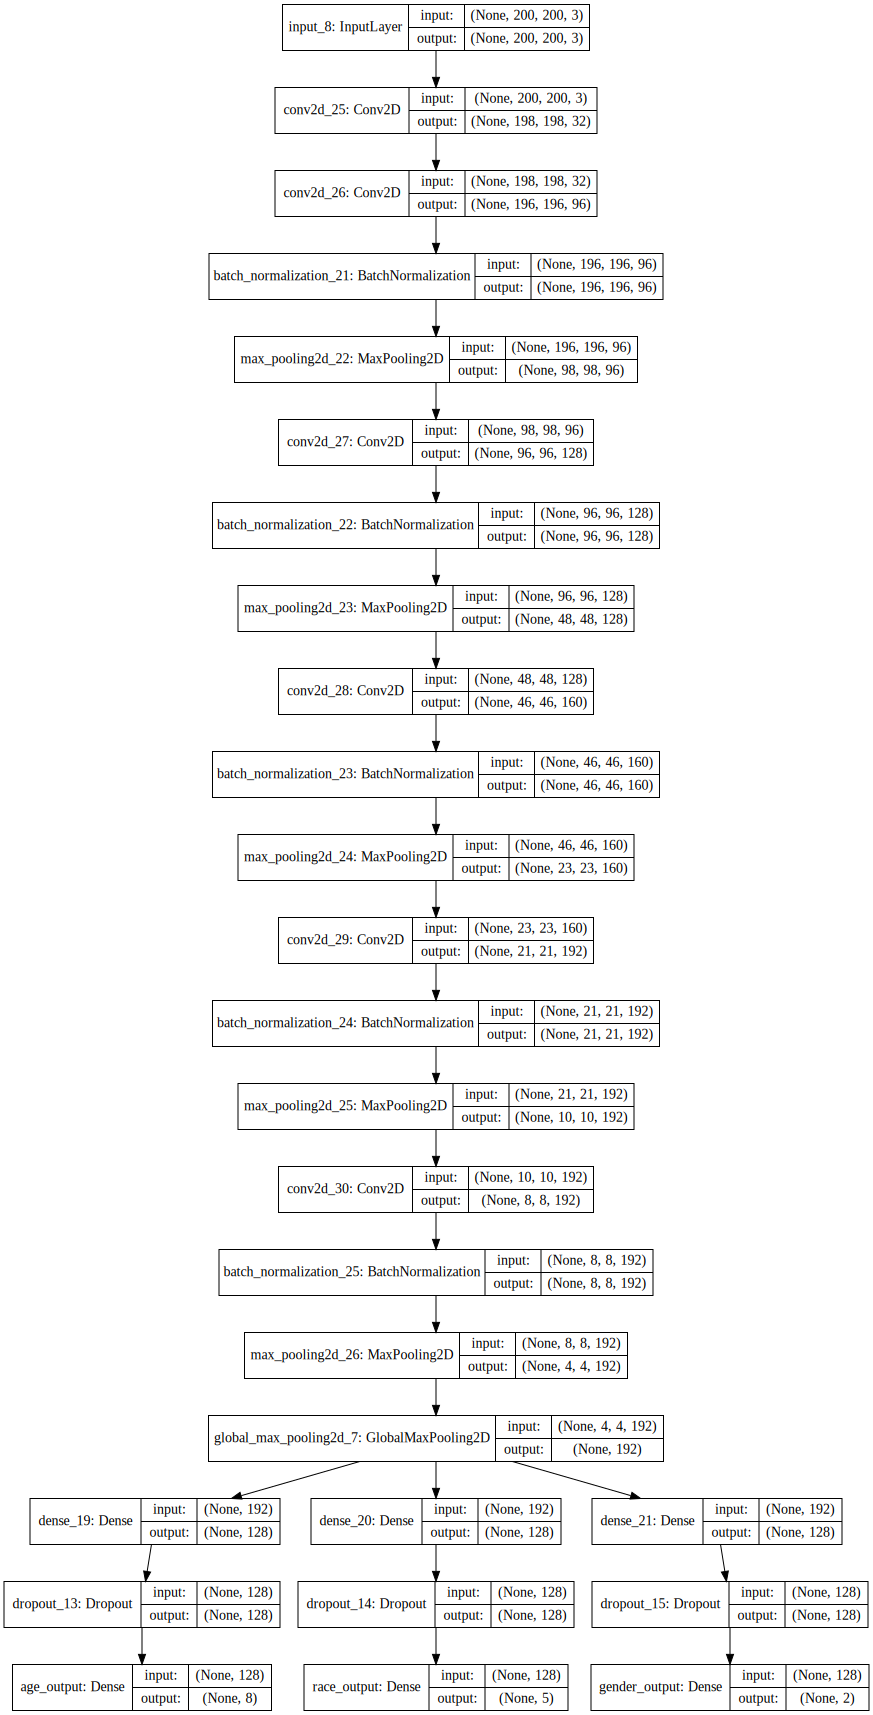

In [113]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [114]:
plot_model(model, to_file='ReLU.png')

In [237]:
from keras.callbacks import ModelCheckpoint

batch_size = 16 #64
valid_batch_size = 16 #64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]

history = model.fit_generator(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=8,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)
                    


Epoch 1/8
490/490 [==============================] - 92s 188ms/step - loss: 6.6045 - age_output_loss: 1.8933 - race_output_loss: 1.4854 - gender_output_loss: 0.5897 - age_output_acc: 0.2466 - race_output_acc: 0.3589 - gender_output_acc: 0.6875 - val_loss: 6.4762 - val_age_output_loss: 1.8895 - val_race_output_loss: 1.4302 - val_gender_output_loss: 0.5518 - val_age_output_acc: 0.2193 - val_race_output_acc: 0.3996 - val_gender_output_acc: 0.7167
Epoch 2/8
490/490 [==============================] - 95s 193ms/step - loss: 6.0636 - age_output_loss: 1.8042 - race_output_loss: 1.3383 - gender_output_loss: 0.4479 - age_output_acc: 0.2643 - race_output_acc: 0.4526 - gender_output_acc: 0.7989 - val_loss: 5.9252 - val_age_output_loss: 1.7919 - val_race_output_loss: 1.2186 - val_gender_output_loss: 0.5136 - val_age_output_acc: 0.2772 - val_race_output_acc: 0.5364 - val_gender_output_acc: 0.7782utput_acc: 0.4283 - gender_ou - ETA - ETA: 2s - loss: 6.0691 - age_output_loss: 1.8035 - race_output_loss

Saving figure model1_accuracy


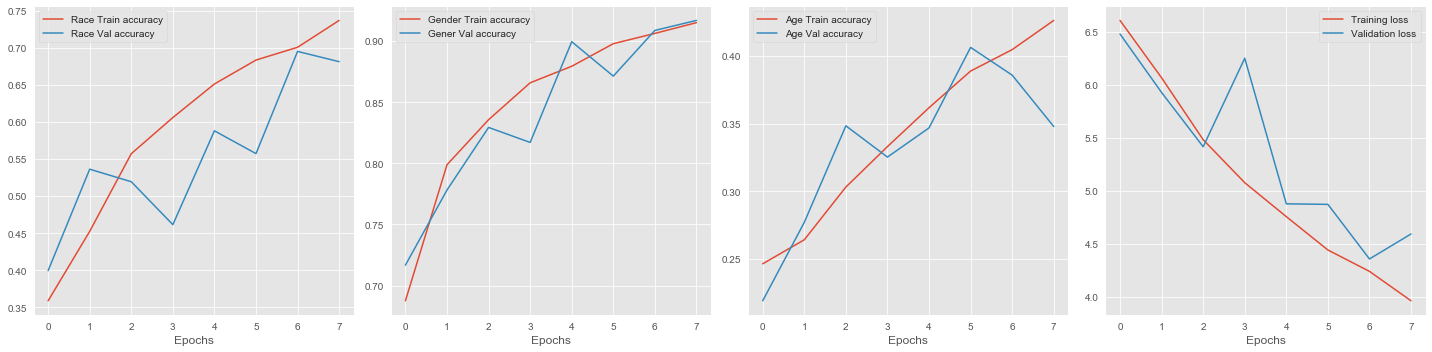

In [238]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].plot(history.history['race_output_acc'], label='Race Train accuracy')
    axes[0].plot(history.history['val_race_output_acc'], label='Race Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['gender_output_acc'], label='Gender Train accuracy')
    axes[1].plot(history.history['val_gender_output_acc'], label='Gener Val accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['age_output_acc'], label='Age Train accuracy')
    axes[2].plot(history.history['val_age_output_acc'], label='Age Val accuracy')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

    axes[3].plot(history.history['loss'], label='Training loss')
    axes[3].plot(history.history['val_loss'], label='Validation loss')
    axes[3].set_xlabel('Epochs')
    axes[3].legend()

plot_train_history(history)
save_fig('model1_accuracy')

In [239]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=32) #128
dict(zip(model.metrics_names, model.evaluate_generator(test_gen, steps=len(test_idx)//32)))


{'loss': 5.70085072517395,
 'age_output_loss': 1.6525902152061462,
 'race_output_loss': 1.3987804055213928,
 'gender_output_loss': 0.2974995821714401,
 'age_output_acc': 0.34375,
 'race_output_acc': 0.453125,
 'gender_output_acc': 0.859375}

In [240]:
batchSize = 32

race_pred_list, gender_pred_list, age_pred_list = [],[],[] 
x_test_list, age_true_list, race_true_list, gender_true_list = [], [], [], []

test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=batchSize) #128
for i in range(2):
    x_test, (age_true, race_true, gender_true) = next(test_gen)
    age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)
    race_true, gender_true, age_true= race_true.argmax(axis=-1), gender_true.argmax(axis=-1), age_true.argmax(axis=-1)
    race_pred, gender_pred, age_pred = race_pred.argmax(axis=-1), gender_pred.argmax(axis=-1), age_pred.argmax(axis=-1)
    
    # append to the lists (x_test and true)
    x_test_list.append(x_test)
    race_true_list.append(race_true)
    gender_true_list.append(gender_true)
    age_true_list.append(age_true)
    
    # append to the lists (pred)
    race_pred_list.append(race_pred)
    gender_pred_list.append(gender_pred)
    age_pred_list.append(age_pred)
    

# multiple nested lists into 1
x_test_list = np.concatenate(x_test_list)
race_true_list = np.concatenate(race_true_list)
gender_true_list = np.concatenate(gender_true_list) 
age_true_list = np.concatenate(age_true_list) 

race_pred_list = np.concatenate(race_pred_list)
gender_pred_list = np.concatenate(gender_pred_list) 
age_pred_list = np.concatenate(age_pred_list) 



race_true_list = np.array(list(map(lambda race: ID_RACE_MAP[race], race_true_list)))
gender_true_list = np.array(list(map(lambda gender: ID_GENDER_MAP[gender], gender_true_list)))
age_true_list = np.array(list(map(lambda age: ID_AGE_MAP[age], age_true_list)))

race_pred_list = np.array(list(map(lambda race: ID_RACE_MAP[race], race_pred_list)))
gender_pred_list = np.array(list(map(lambda gender: ID_GENDER_MAP[gender], gender_pred_list)))
age_pred_list = np.array(list(map(lambda age: ID_AGE_MAP[age], age_pred_list)))

In [241]:
# test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=32) #128
# x_test, (age_true, race_true, gender_true) = next(test_gen)
# age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)

In [242]:
def makeJSON1(keys,races,genders,ages):
    def helper(isface,age,gender,race):
        if isface:
            return {"age": age, "gender": gender, "race": race}
        else:
            return {}
    return {i:{"isface": True, "appearance": helper(True,j,k,l)} for i,j,k,l in zip(keys,races,genders,ages)}

In [243]:
def makeJSON2(keys,races,genders,ages):
    return {i:{"appearance": {"age": int(l), "gender": int(k), "race": int(j)}} for i,j,k,l in zip(keys,races,genders,ages)}

In [244]:
# get range of race_pred_index
tempKeys = range(len(race_pred))
# # convert to string format
# tempKeys = np.array(list(map(str, tempKeys)))
# # to dictionary format
# temp = makeJSON2(tempKeys,race_pred,gender_pred,age_pred)

In [245]:
tempDict = makeJSON2(tempKeys,race_pred,gender_pred,age_pred)

In [246]:
import json
json.dumps(tempDict)

'{"0": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "1": {"appearance": {"age": 2, "gender": 0, "race": 3}}, "2": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "3": {"appearance": {"age": 3, "gender": 0, "race": 3}}, "4": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "5": {"appearance": {"age": 4, "gender": 1, "race": 0}}, "6": {"appearance": {"age": 3, "gender": 0, "race": 3}}, "7": {"appearance": {"age": 3, "gender": 1, "race": 3}}, "8": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "9": {"appearance": {"age": 4, "gender": 0, "race": 0}}, "10": {"appearance": {"age": 3, "gender": 0, "race": 1}}, "11": {"appearance": {"age": 2, "gender": 0, "race": 2}}, "12": {"appearance": {"age": 3, "gender": 0, "race": 2}}, "13": {"appearance": {"age": 3, "gender": 0, "race": 2}}, "14": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "15": {"appearance": {"age": 4, "gender": 0, "race": 3}}, "16": {"appearance": {"age": 2, "gender": 0, "race": 2}}, "17": {"appearance": {

In [247]:

# with open("result.json","w") as f:
#     json.dump(tempDict,f)
    

In [248]:
from sklearn.metrics import classification_report
print("Classification report for race")
print(classification_report(race_true, race_pred))

print("\nClassification report for gender")
print(classification_report(gender_true, gender_pred))

print("\nClassification report for age")
print(classification_report(age_true, age_pred))


Classification report for race
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.44      1.00      0.62         4
           2       0.67      0.67      0.67         6
           3       0.10      0.33      0.15         3
           4       0.00      0.00      0.00         0

    accuracy                           0.47        32
   macro avg       0.44      0.46      0.38        32
weighted avg       0.78      0.47      0.50        32


Classification report for gender
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.75      0.50      0.60         6

    accuracy                           0.88        32
   macro avg       0.82      0.73      0.76        32
weighted avg       0.87      0.88      0.86        32


Classification report for age
              precision    recall  f1-score   support

           2       0.25      0.17

C:\Anaconda3\envs\motionFlow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda3\envs\motionFlow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Saving figure test_output


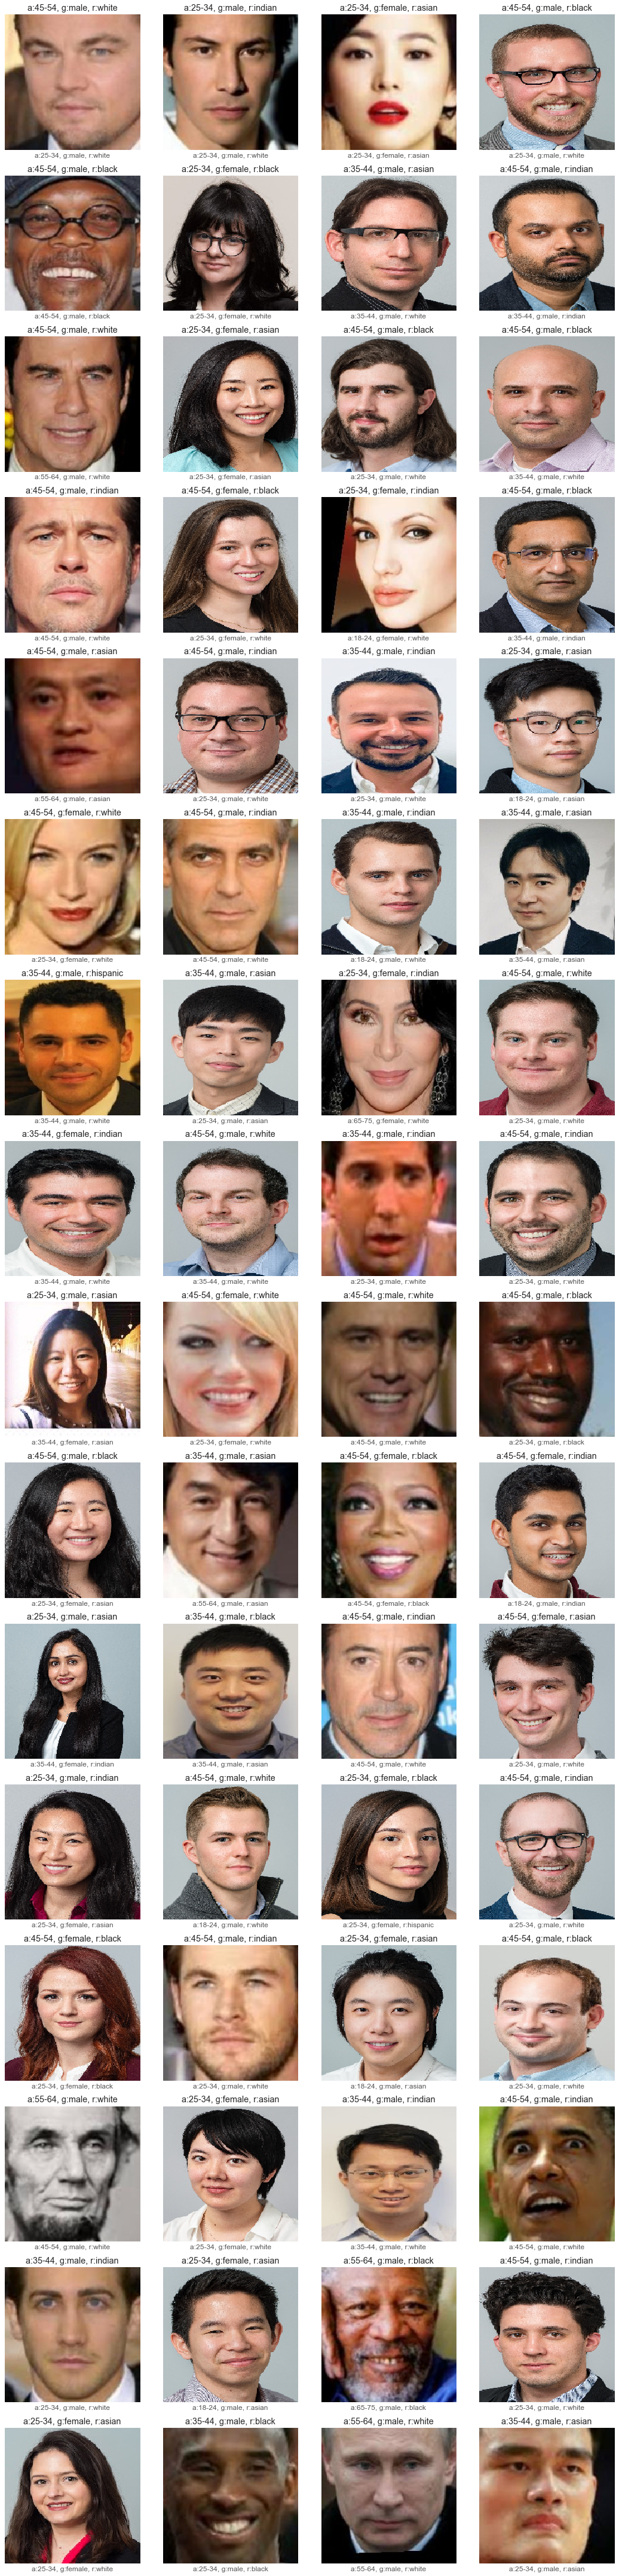

In [249]:
import math
n = 64
random_indices = np.random.permutation(n)
n_cols = 4
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 60))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test_list[img_idx])
    ax.set_title('a:{}, g:{}, r:{}'.format(age_pred_list[img_idx], gender_pred_list[img_idx], race_pred_list[img_idx]))
    ax.set_xlabel('a:{}, g:{}, r:{}'.format(age_true_list[img_idx], gender_true_list[img_idx], race_true_list[img_idx]))
    ax.set_xticks([])
    ax.set_yticks([])
save_fig('test_output')

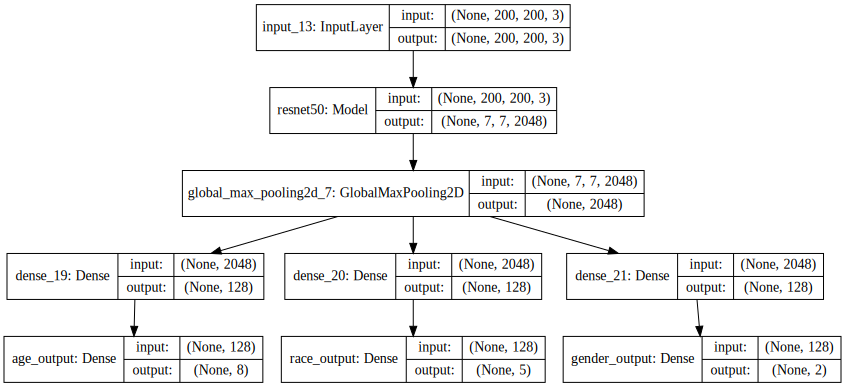

In [543]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [292]:

ResNet50_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [293]:
conv_base.trainable = False